In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2025-11-19 10:02:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip’

bank-additional.zip     [     <=>            ] 434.15K  29.3KB/s    in 13s     

2025-11-19 10:02:41 (34.0 KB/s) - ‘bank-additional.zip’ saved [444572]



In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip

--2025-11-19 10:02:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/zip]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K   604KB/s    in 0.7s    

2025-11-19 10:03:01 (604 KB/s) - ‘bank-additional.zip.1’ saved [444572/444572]



In [ ]:
!unzip -o -q bank-additional.zip

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

**Dataset exploration**

Read the data and look at the first 5 rows using the head method

In [ ]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


**Look at the dataset size, feature named and their types**

In [ ]:
df.shape
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,no


**Attributing Information**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [ ]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
df["y"].value_counts()

,count
y,
no,36548
yes,4640


In [ ]:
df["marital"].value_counts(normalize = True)

,proportion
marital,
married,0.61
single,0.28
divorced,0.11
unknown,0.00


Sorting

In [ ]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.41,5195.80,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.70,94.03,-38.30,0.89,4991.60,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


In [ ]:
df.sort_values(by = ["age", "duration"],ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.40,92.43,-26.90,0.74,5017.50,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.90,92.20,-31.40,0.87,5076.20,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.90,92.20,-31.40,0.88,5076.20,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.90,92.20,-31.40,0.87,5076.20,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.90,92.20,-31.40,0.87,5076.20,no


**Application of functions : apply, map**

Apply the function to each column

In [ ]:
df.apply(np.max)

,0
age,98
job,unknown
marital,unknown
education,unknown
default,yes
housing,yes
loan,yes
contact,telephone
month,sep
day_of_week,wed


Apply the fuction to each column cell

In [ ]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


Indexing and extracting data

In [ ]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


What are the mean value of numerical features among the attracted clients?

In [ ]:
df[df["y"] == 1].mean(numeric_only=True)

,0
age,40.91
duration,553.19
campaign,2.05
pdays,792.04
previous,0.49
emp.var.rate,-1.23
cons.price.idx,93.35
cons.conf.idx,-39.79
euribor3m,2.12
nr.employed,5095.12


What is the average call duration for the attracted clients

In [ ]:
acd = round(df[df["y"] == 1]["duration"].mean(),2)
acd_in_min = acd //60
print("Average call duration for attracted clients=", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients= 9.0 min 13 sec


What is the average age of attracted (y==1) and unmarried ('marital' == 'single') clients?

In [ ]:
print("Average age of attracted clients=",int(df[(df["y"] == 1) & (df["marital"]== "single")] ["age"].mean()),"years")

Average age of attracted clients= 31 years


To get the first or last line of the dataframe


In [ ]:

df[:1]
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,0


Pivot Tables

In [ ]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


In [ ]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')


marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.00
1,0.10,0.55,0.35,0.00


In [ ]:
df.pivot_table(
    ["age" , "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


**Visualization in Pandas**

Scatter matrix

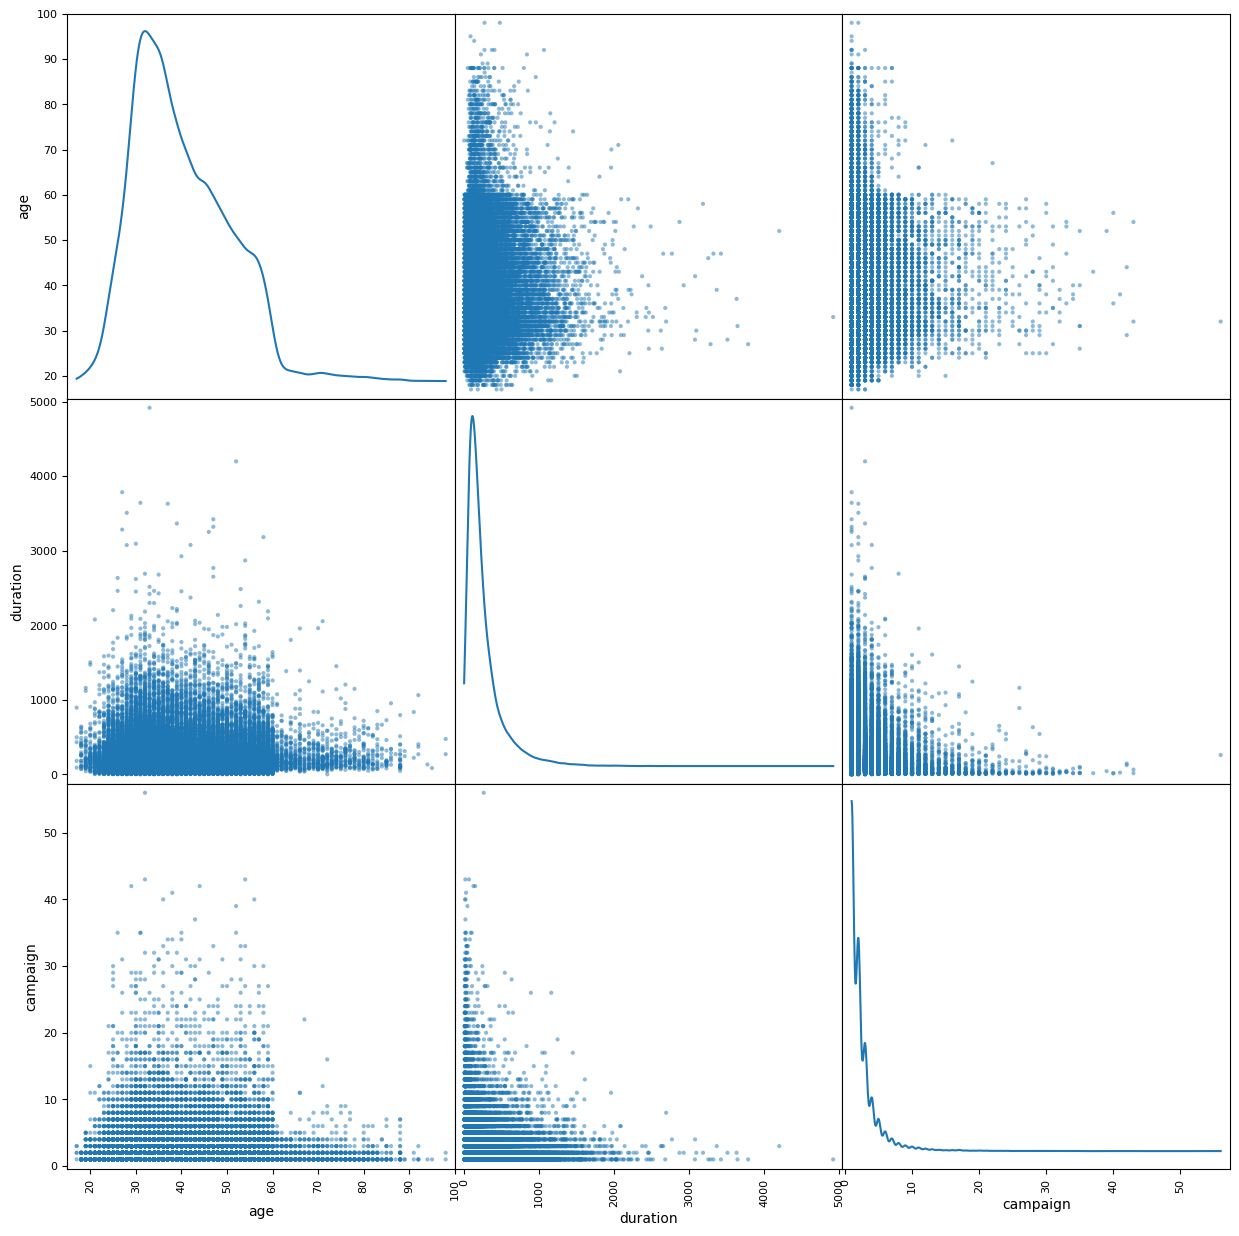

In [ ]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15,15),
    diagonal = "kde")
plt.show()

Histogram for age

<Axes: >

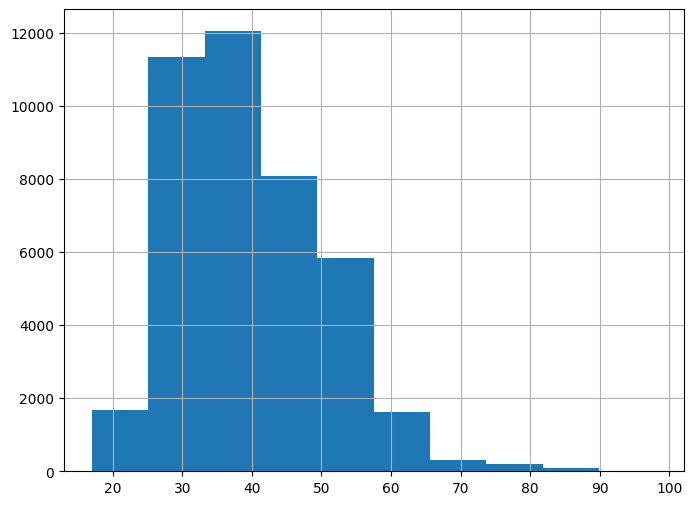

In [ ]:
df["age"].hist()

Histogram for features all together

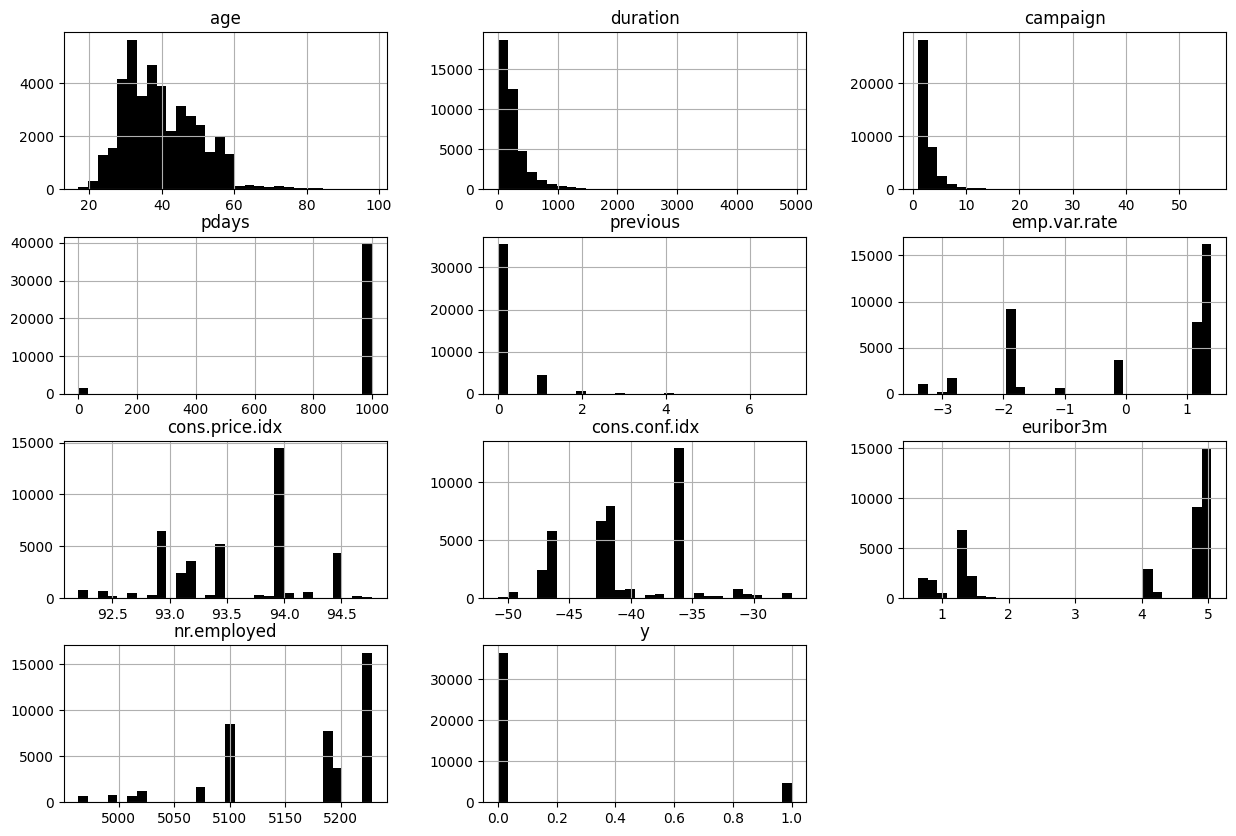

In [ ]:
df.hist(color = "k",
        bins = 30,
        figsize = (15,10))
plt.show()

BOX Plot

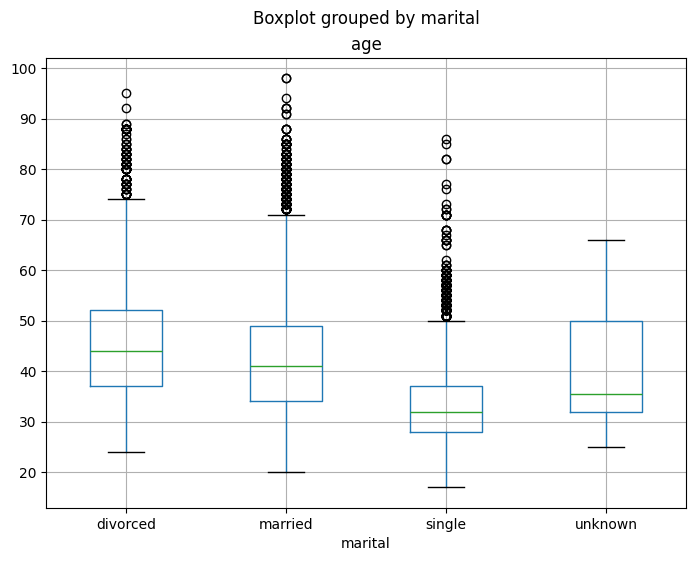

In [ ]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

**Data Grouping**

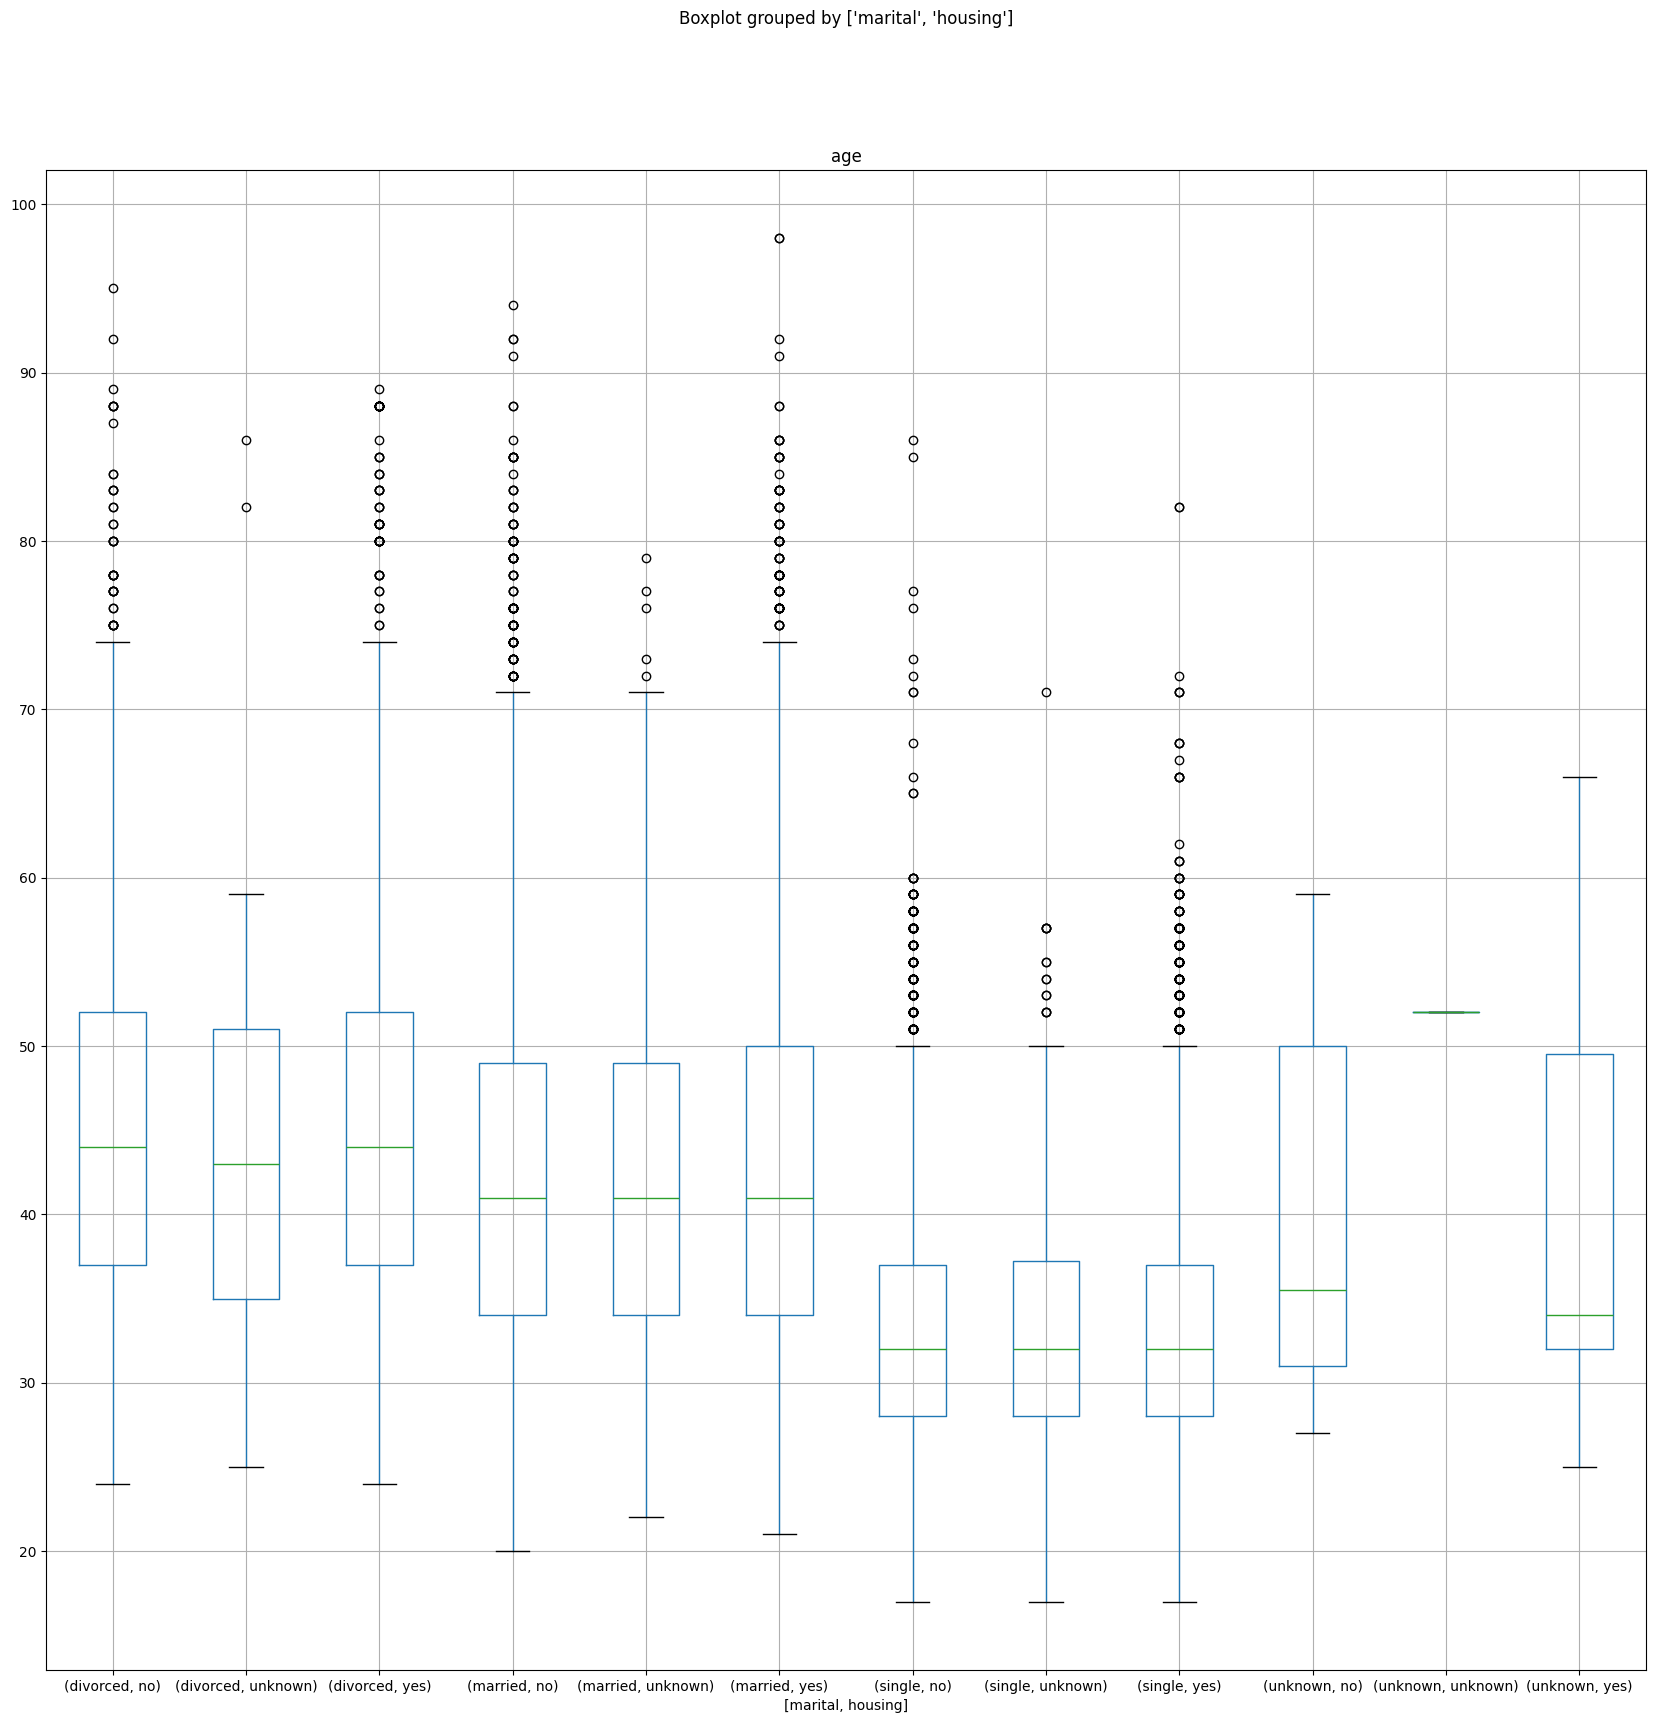

In [ ]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20,20))
plt.show()